[[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1], [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1], [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1]]
[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 1], [0, 0, 1, 0, 1, 1, 0], [0, 0, 1, 1, 0, 0, 1], [0, 1, 0, 0, 1, 0, 1], [0, 1, 0, 1, 0, 1, 0], [0, 1, 1, 0, 0, 1, 1], [0, 1, 1, 1, 1, 0, 0], [1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 1, 0, 1, 0], [1, 1, 0, 0, 1, 1, 0], [1, 1, 0, 1, 0, 0, 1], [1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1]]

3番目のベクトル([0, 0, 1, 0, 1, 1, 0])を送信符号語に選択
[0, 0, 1, 0, 1, 1, 0]

xビット目に誤りを生成
[0, 0, 1, 0, 1, 0, 0]

計算結果
[0 1 1]

誤りベクトル、シンドローム
[0,0,0,0,0,0,0] [0,0,0]
[1,0,0,0,0,0,0] [1,0,0]
[0,1,0,0,0,0,0] [0,1,0]
[0,0,1,0,0,0,0] [1,1,0]
[0,0,0,1,0,0,0] [0,0,1]
[0,0,0,0,1,0,0] [1,0,1]
[0,0,0,0,0,1,0] [0,1,1]
[0,0,0,0,0,0,1] [1,1,1]

送信符号語
[0, 0, 1, 0, 1, 0, 0]


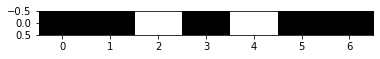


シンドローム
[0 1 1]


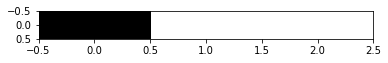

In [2]:
import numpy as np
import matplotlib.pyplot as plt

G = np.array([
        [1, 0, 0, 0, 0, 1, 1],
        [0, 1, 0, 0, 1, 0, 1],
        [0, 0, 1, 0, 1, 1, 0],
        [0, 0, 0, 1, 1, 1, 1]
    ])

H = np.array([
        [1, 0, 1, 0, 1, 0, 1],
        [0, 1, 1, 0, 0, 1, 1],
        [0, 0, 0, 1, 1, 1, 1]
        ])

N = np.arange(0,16)

R = []
for i in N:
    tmp = ('{:04b}'.format(i))
    tmp2 = list(tmp)
    for j in range(len(tmp2)):
        tmp2[j] = int(tmp2[j])
    R.append(list(tmp2))

print(R)

R2 = []
for i in R:
    tmp = np.array(i)
    tmp2 = np.dot(tmp,G)%2
    R2.append(list(tmp2))
    
print(R2)
print("")

print("3番目のベクトル([0, 0, 1, 0, 1, 1, 0])を送信符号語に選択")
print(R2[2:3][0])

import random
x = random.randint(0,6)

print("")
print("xビット目に誤りを生成")
if R2[2:3][0][x] == 0:
    (R2[2:3][0][x]) = 1 
else:
    (R2[2:3][0][x]) = 0
    
print(R2[2:3][0])
 
tmp2 = np.dot(R2[2:3][0],H.transpose())%2

print("")
print("計算結果")
print(tmp2)

print("")    
print("誤りベクトル、シンドローム")
print("[0,0,0,0,0,0,0] [0,0,0]")
print("[1,0,0,0,0,0,0] [1,0,0]")
print("[0,1,0,0,0,0,0] [0,1,0]")
print("[0,0,1,0,0,0,0] [1,1,0]")
print("[0,0,0,1,0,0,0] [0,0,1]")
print("[0,0,0,0,1,0,0] [1,0,1]")
print("[0,0,0,0,0,1,0] [0,1,1]")
print("[0,0,0,0,0,0,1] [1,1,1]")
    
print("")
print("送信符号語")

tmp4 = []
for i in R2[2:3][0]:
    tmp4.append(i*255)   
print(R2[2:3][0])
img_gray = np.array([tmp4], dtype = np.uint8)
plt.imshow(img_gray, cmap = 'gray', vmin = 0, vmax = 128, interpolation = 'none', aspect=0.5)
plt.show()

print("")
print("シンドローム")

tmp3 = []
for i in tmp2:
    tmp3.append(i*255)   
print(tmp2)

img_gray = np.array([tmp3], dtype = np.uint8)
plt.imshow(img_gray, cmap = 'gray', vmin = 0, vmax = 128, interpolation = 'none', aspect=0.25)
plt.show()

